# Dataset : Asia Cup Champions History Analysis 
1. Why This Project?
1. Analyze the historical success and dominance of teams in the Asia Cup.
2. Track the evolution of the tournament (number of teams, host country frequency).
3. Use Pandas for frequency counting and statistical summary.
4. Visualize championship and runner-up statistics.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

In [2]:
df_champ = pd.read_csv('champion.csv')
df_champ.head()

,Year,Host,No Of Team,Champion,Runner Up,Player Of The Series,Highest Run Scorer,Highest Wicket Taker
0,1984,UAE,3,India,Sri Lanka,Surinder Khanna,Surinder Khanna,Ravi Shastri
1,1986,Sri Lanka,3,Sri Lanka,Pakistan,Arjuna Ranatunga,Arjuna Ranatunga,Abdul Qadir
2,1988,Bangladesh,4,India,Sri Lanka,Navjot Sidhu,Ijaz Ahmed,Arshad Ayub
3,1990,India,3,India,Sri Lanka,Not Awarded,Arjuna Ranatunga,Kapil Dev
4,1995,UAE,4,India,Sri Lanka,Navjot Sidhu,Sachin Tendulkar,Anil Kumble


## 4. Explore Data

In [3]:
print("Shape:", df_champ.shape)
print(df_champ.info())
print(df_champ.isnull().sum())
print(df_champ.describe())

Shape: (15, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  15 non-null     int64 
 1   Host                  15 non-null     object
 2   No Of Team            15 non-null     int64 
 3   Champion              15 non-null     object
 4   Runner Up             15 non-null     object
 5   Player Of The Series  15 non-null     object
 6   Highest Run Scorer    15 non-null     object
 7   Highest Wicket Taker  15 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.1+ KB
None
Year                    0
Host                    0
No Of Team              0
Champion                0
Runner Up               0
Player Of The Series    0
Highest Run Scorer      0
Highest Wicket Taker    0
dtype: int64
              Year  No Of Team
count    15.000000   15.000000
mean   2002.933333    4.466667
std      12.49

### Insights:
1. The dataset spans 15 Asia Cup tournaments from 1984 to 2022.

2. The average number of participating teams is ≈4.47, ranging from 3 to 6 teams.

## 5. Analysis with NumPy & Pandas

In [4]:
total_cups = df_champ.shape[0]
print(f"1. Total Asia Cup Tournaments: {total_cups}")

champion_counts = df_champ['Champion'].value_counts()
most_successful_team = champion_counts.index[0]
print(f"\n2. Most Successful Champion: {most_successful_team} ({champion_counts.max()} Titles)")

finalist_counts = pd.concat([df_champ['Champion'], df_champ['Runner Up']]).value_counts()
print("\n3. Final Appearances (Champion + Runner Up):\n", finalist_counts)

host_counts = df_champ['Host'].value_counts()
print("\n4. Most Frequent Host Country:\n", host_counts.head(1))

1. Total Asia Cup Tournaments: 15

2. Most Successful Champion: India (7 Titles)

3. Final Appearances (Champion + Runner Up):
 Sri Lanka     12
India         10
Pakistan       5
Bangladesh     3
Name: count, dtype: int64

4. Most Frequent Host Country:
 Host
Bangladesh    5
Name: count, dtype: int64


### Insights:
1. Dominance: India is the most successful team with 7 championships.

2. Finals Experience: Sri Lanka has the most final appearances (12), followed by India (11).

3. Hosting: Bangladesh has been the most frequent host (5 times).

## 6. Visualization with Matplotlib

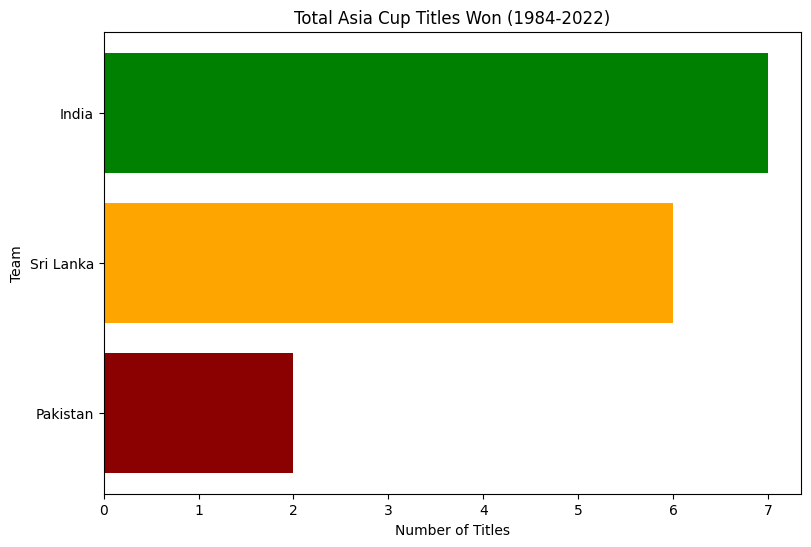

In [5]:
# Bar chart of Championship Wins
champion_counts = df_champ['Champion'].value_counts().sort_values(ascending=True)
teams = champion_counts.index
wins = champion_counts.values

plt.figure(figsize=(9, 6))
plt.barh(teams, wins, color=['darkred', 'orange', 'green', 'blue'])
plt.title("Total Asia Cup Titles Won (1984-2022)")
plt.xlabel("Number of Titles")
plt.ylabel("Team")
plt.show()

### Insights:
The visualization clearly depicts India's lead in total titles, followed by Sri Lanka and Pakistan.

## 7. Visualization with Seaborn

C:\Users\tranu\AppData\Local\Temp\ipykernel_17784\1909164285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=finalist_counts.index, y=finalist_counts.values, palette='crest')


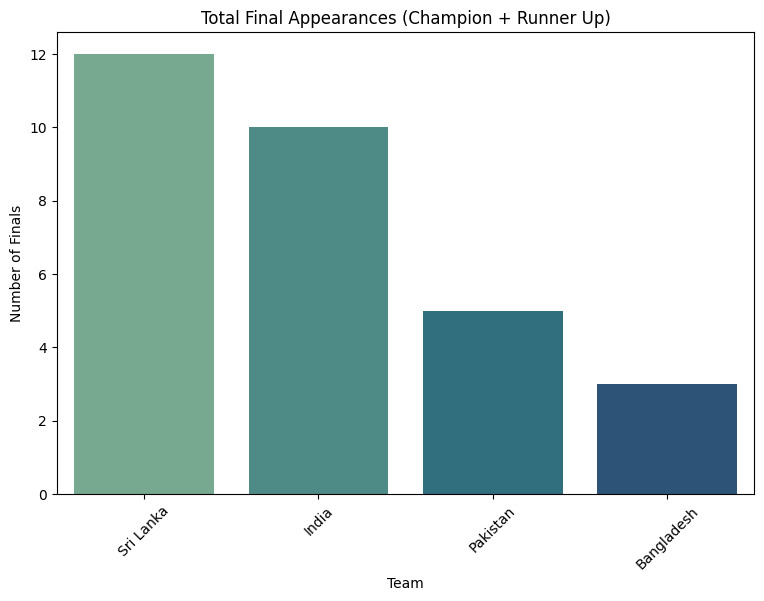

In [6]:
# Countplot of Final Appearances
finalist_counts = pd.concat([df_champ['Champion'], df_champ['Runner Up']]).value_counts()

plt.figure(figsize=(9, 6))
sns.barplot(x=finalist_counts.index, y=finalist_counts.values, palette='crest')
plt.title("Total Final Appearances (Champion + Runner Up)")
plt.xlabel("Team")
plt.ylabel("Number of Finals")
plt.xticks(rotation=45)
plt.show()

### Insights:
Sri Lanka's high number of final appearances (12) is clearly visible, making them the most consistent team in terms of reaching the final match.

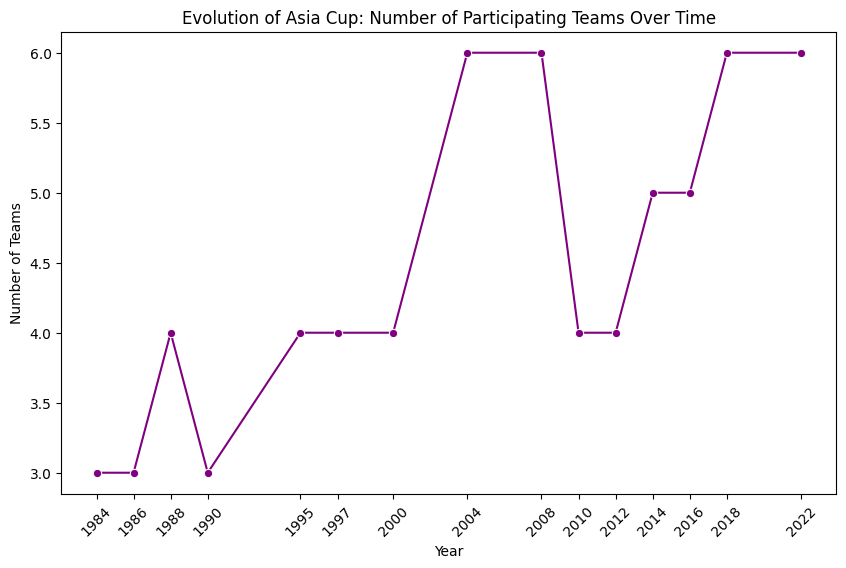

In [7]:
# Line Plot of No. of Teams Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='No Of Team', data=df_champ, marker='o', color='purple')
plt.title("Evolution of Asia Cup: Number of Participating Teams Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Teams")
plt.xticks(df_champ['Year'], rotation=45)
plt.show()

### Insights:
The tournament has grown in size over the decades, increasing from 3 teams in the early years to 6 in the mid-2000s, reflecting the increasing involvement of Associate nations.